<a href="https://colab.research.google.com/github/samchris77/py/blob/main/Neoplasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q byaldi langchain langchain_community langchain_anthropic pypdf langchain-chroma langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.5/294.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.7/939.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 603.0/603.0 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!sudo apt-get install -y poppler-utils
from google.colab import drive
drive.mount('/content/drive')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (138 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 123621 

In [3]:
from google.colab import userdata
import base64
import os

os.environ['OPENAI_API_KEY'] = userdata.get('OPEN_AI_KEY')
os.environ['HF_TOKEN'] = userdata.get('HUGGINGFACE_KEY')

In [4]:
from byaldi import RAGMultiModalModel

In [5]:
RAG = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2", verbose =1)

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

# 문서 멀티모달 인덱싱

In [6]:
RAG.index(
    input_path="/content/drive/MyDrive/Supabase/Neoplasms.pdf",
    index_name = "neo",
    store_collection_with_index = True,
    overwrite=True
)

Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Added page 16 of document 0 to index.
Added page 17 of document 0 to index.
Added page 18 of document 0 to index.
Added page 19 of document 0 to index.
Added page 20 of document 0 to index.
Added page 21 of document 0 to index.
Added page 22 of document 0 to index.
Added page 23 of document 0 to index.
Added page 24 of document 0 to index.
Added page 25 of document 0 to index.
Added page 26 of document 0 to index.
Added page 27 of docu

{0: '/content/drive/MyDrive/Supabase/Neoplasms.pdf'}

In [7]:
RAG.index

<bound method RAGMultiModalModel.index of <byaldi.RAGModel.RAGMultiModalModel object at 0x7a9a3de7b5e0>>

# 질의가 잘 작동하는지 확인

In [14]:
prompt = "what is the median survival age of gliosarcoma "
results = RAG.search(prompt, k=3)
results

[{'doc_id': 0, 'page_num': 18, 'score': 17.875, 'metadata': {}, 'base64': 'iVBORw0KGgoAAAANSUhEUgAABqQAAAiYCAIAAAA+NVHkAAEAAElEQVR4nOzddVwb5x8H8CcGJAR3Lw6l7u7u7rq2q9u6bp38ttUm7SqT2qqru6/u7k7xosUhBJIQQuT3x9HrNYQQrLTp5/3ijyfPPffckwvJXb55hLX63wMEAAAAAAAAAACAkG7tW1d3E6BC2NXdAAAAAAAAAAAAAKgcCPYBAAAAAAAAAAAYCQT7AAAAAAAAAAAAjASCfQAAAAAAAAAAAEYCwT4AAAAAAAAAAAAjgWAfAAAAAAAAAACAkUCwDwAAAAAAAAAAwEgg2AcAAAAAAAAAAGAkEOwDAAAAAAAAAAAwEgj2AQAAAAAAAAAAGAkE+wAAAAAAAAAAAIwEgn0AAAAAAAAAAABGAsE+AAAAAAAAAAAAI4FgHwAAAAAAAAAAgJFAsA8AAAAAAAAAAMBIINgHAAAAAAAAAABgJBDsAwAAAAAAAAAAMBII9gEAAAAAAAAAABgJBPsAAAAAAAAAAACMBIJ9AAAAAAAAAAAARgLBPgAAAAAAAAAAACOBYB8AAAAAAAAAAICRQLAPAAAAAAAAAADASCDYBwAAAAAAAAAAYCQQ7AMAAAAAAAAAADASCPYBAAAAAAAAAAAYCQT7AAAAAAAAAAAAjASCfQAAAAAAAAAAAEYCwT4AAAAAAAAAAAAjgWAfAAAAAAAAAACAkUCwDwAAAAAAAAAAwEgg2AcAAAAAAAAAAGAkEOwDAAAAAAAAAAAwEgj2AQAAAAAAAAAAGAkE+wAAAAAAAAAAAIwEgn0AAAAAAAAAAABGAsE+AAAAAAAAAAAAI4FgHwAAAAAAAAAAgJFAsA8AAAAAAAAAAMBIINgHAAAAAAAAAABgJBDsAwAAAAAAAAAAMBII9gEAAAAAAAAAABgJBPsAAAAAA

In [18]:
image_bytes = []
for im in results:
  image_bytes.append(base64.b64decode(im.base64))

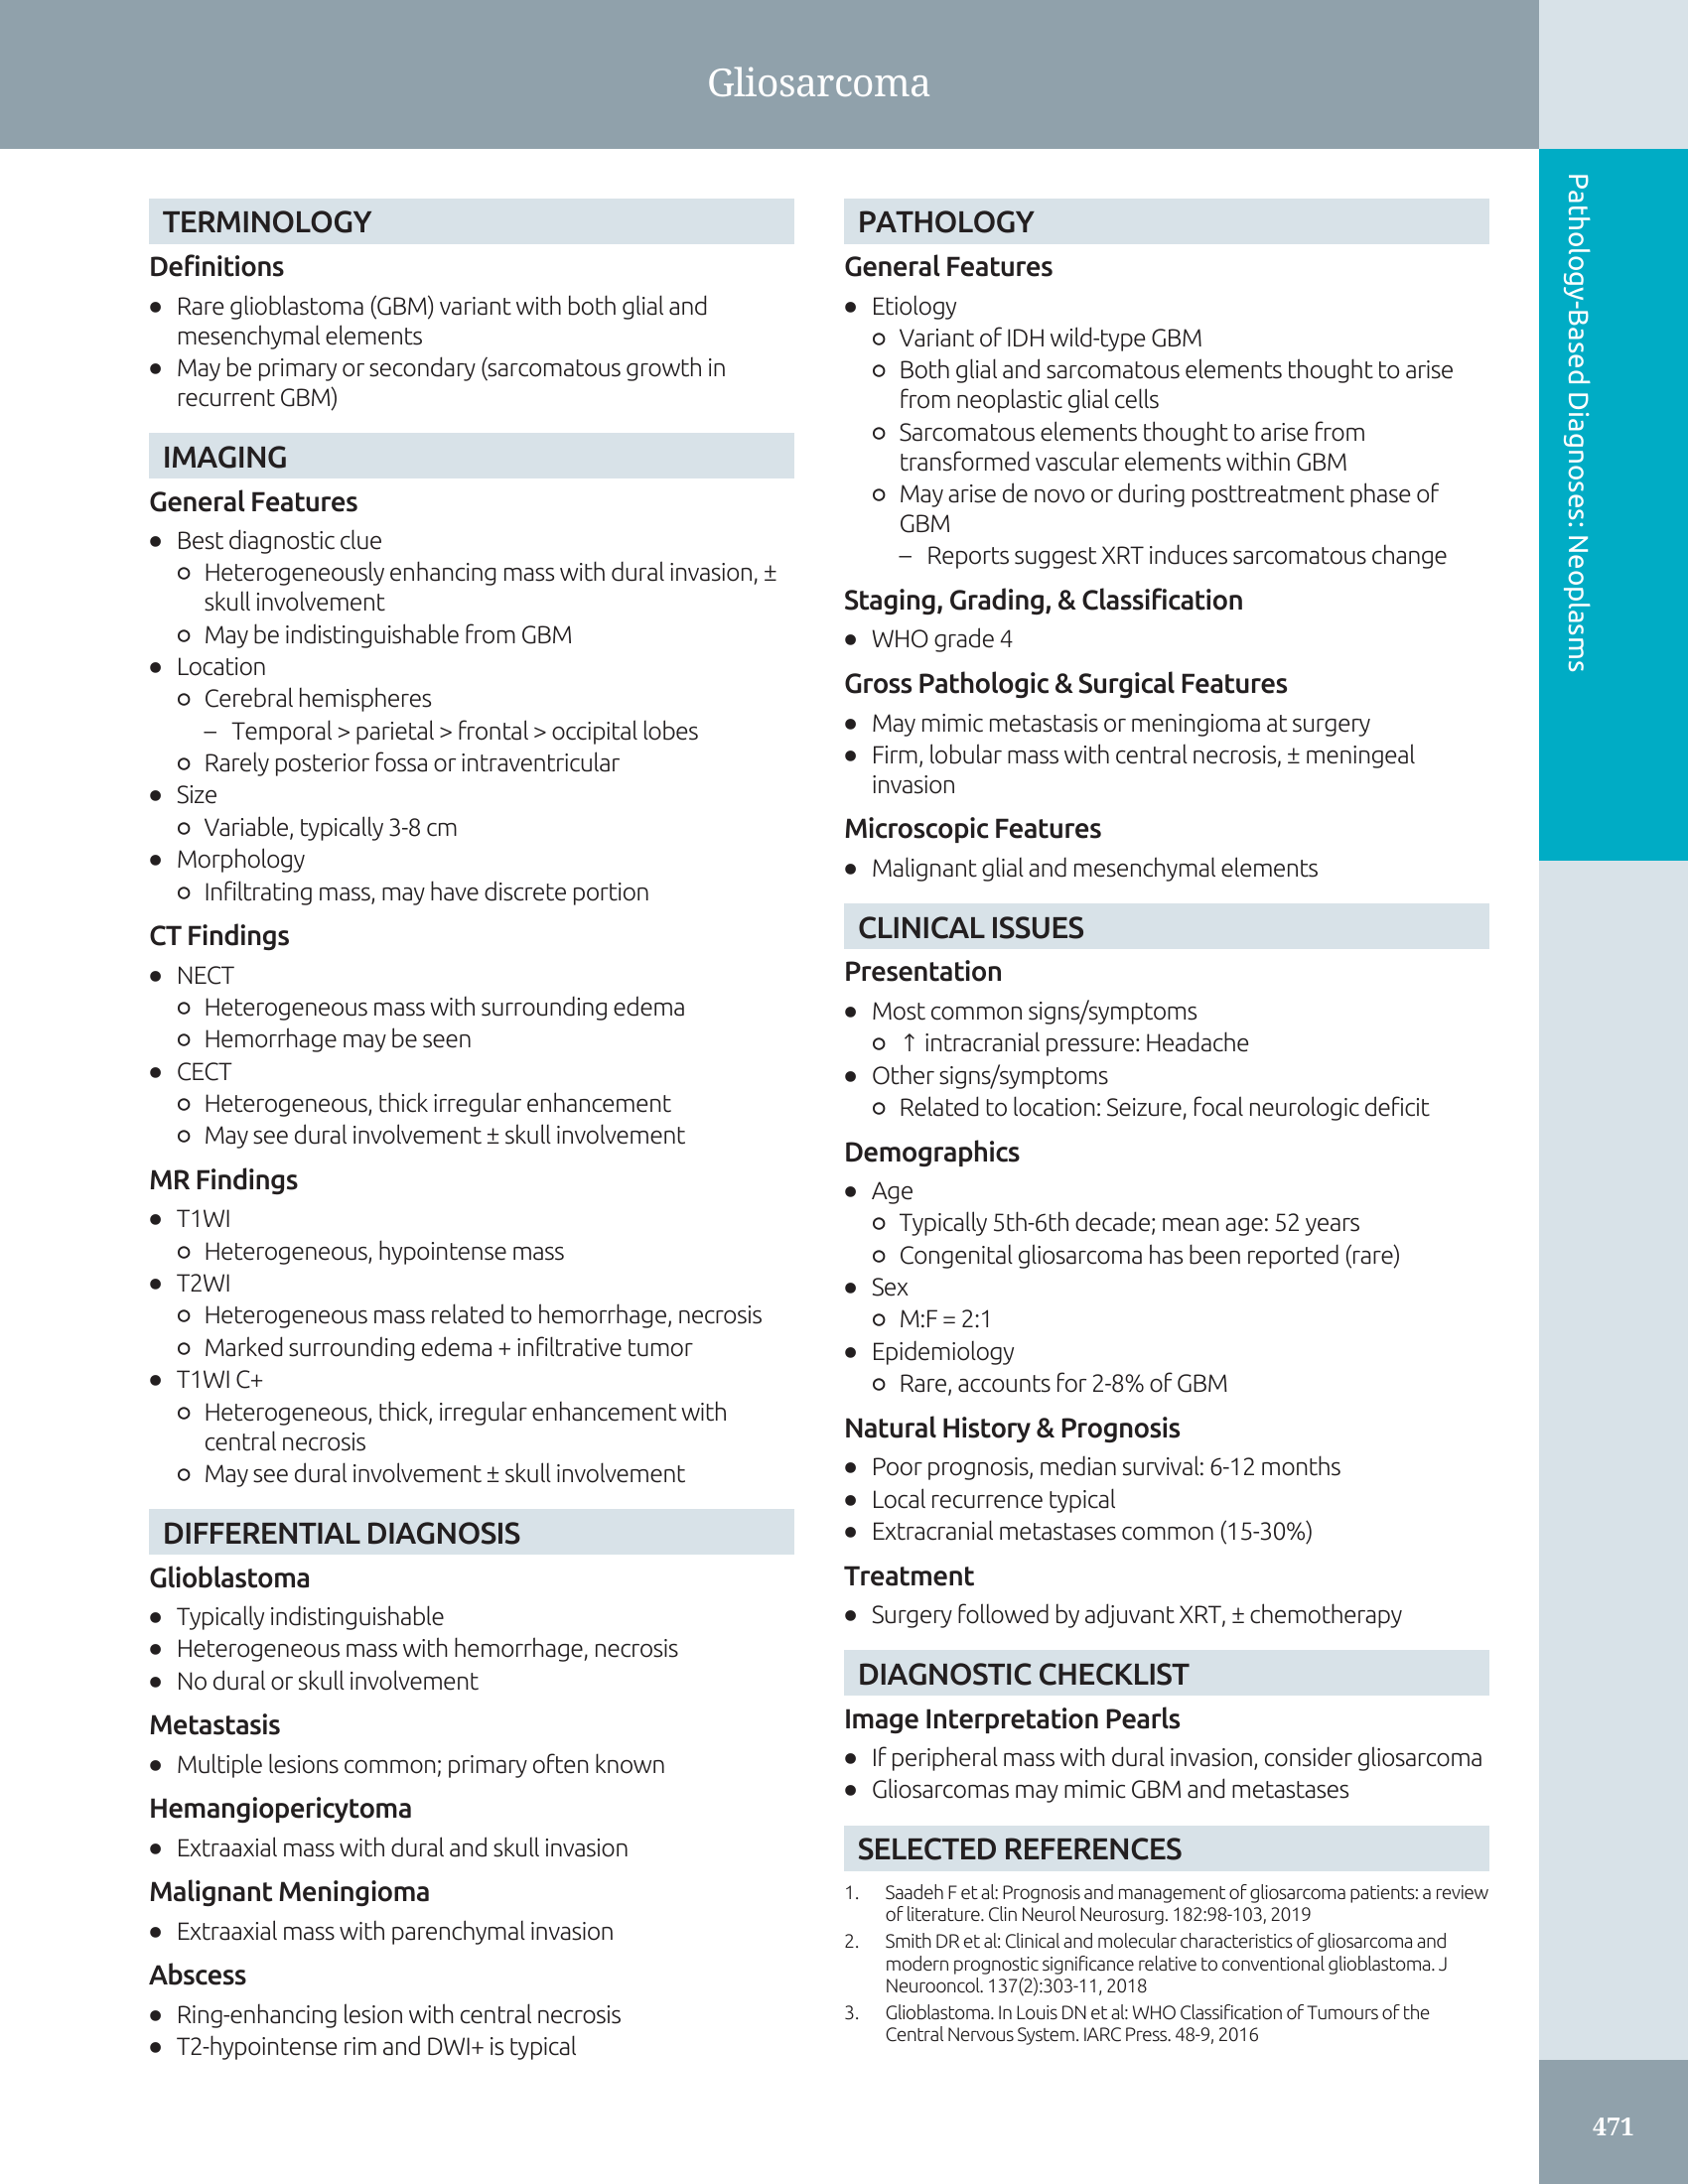

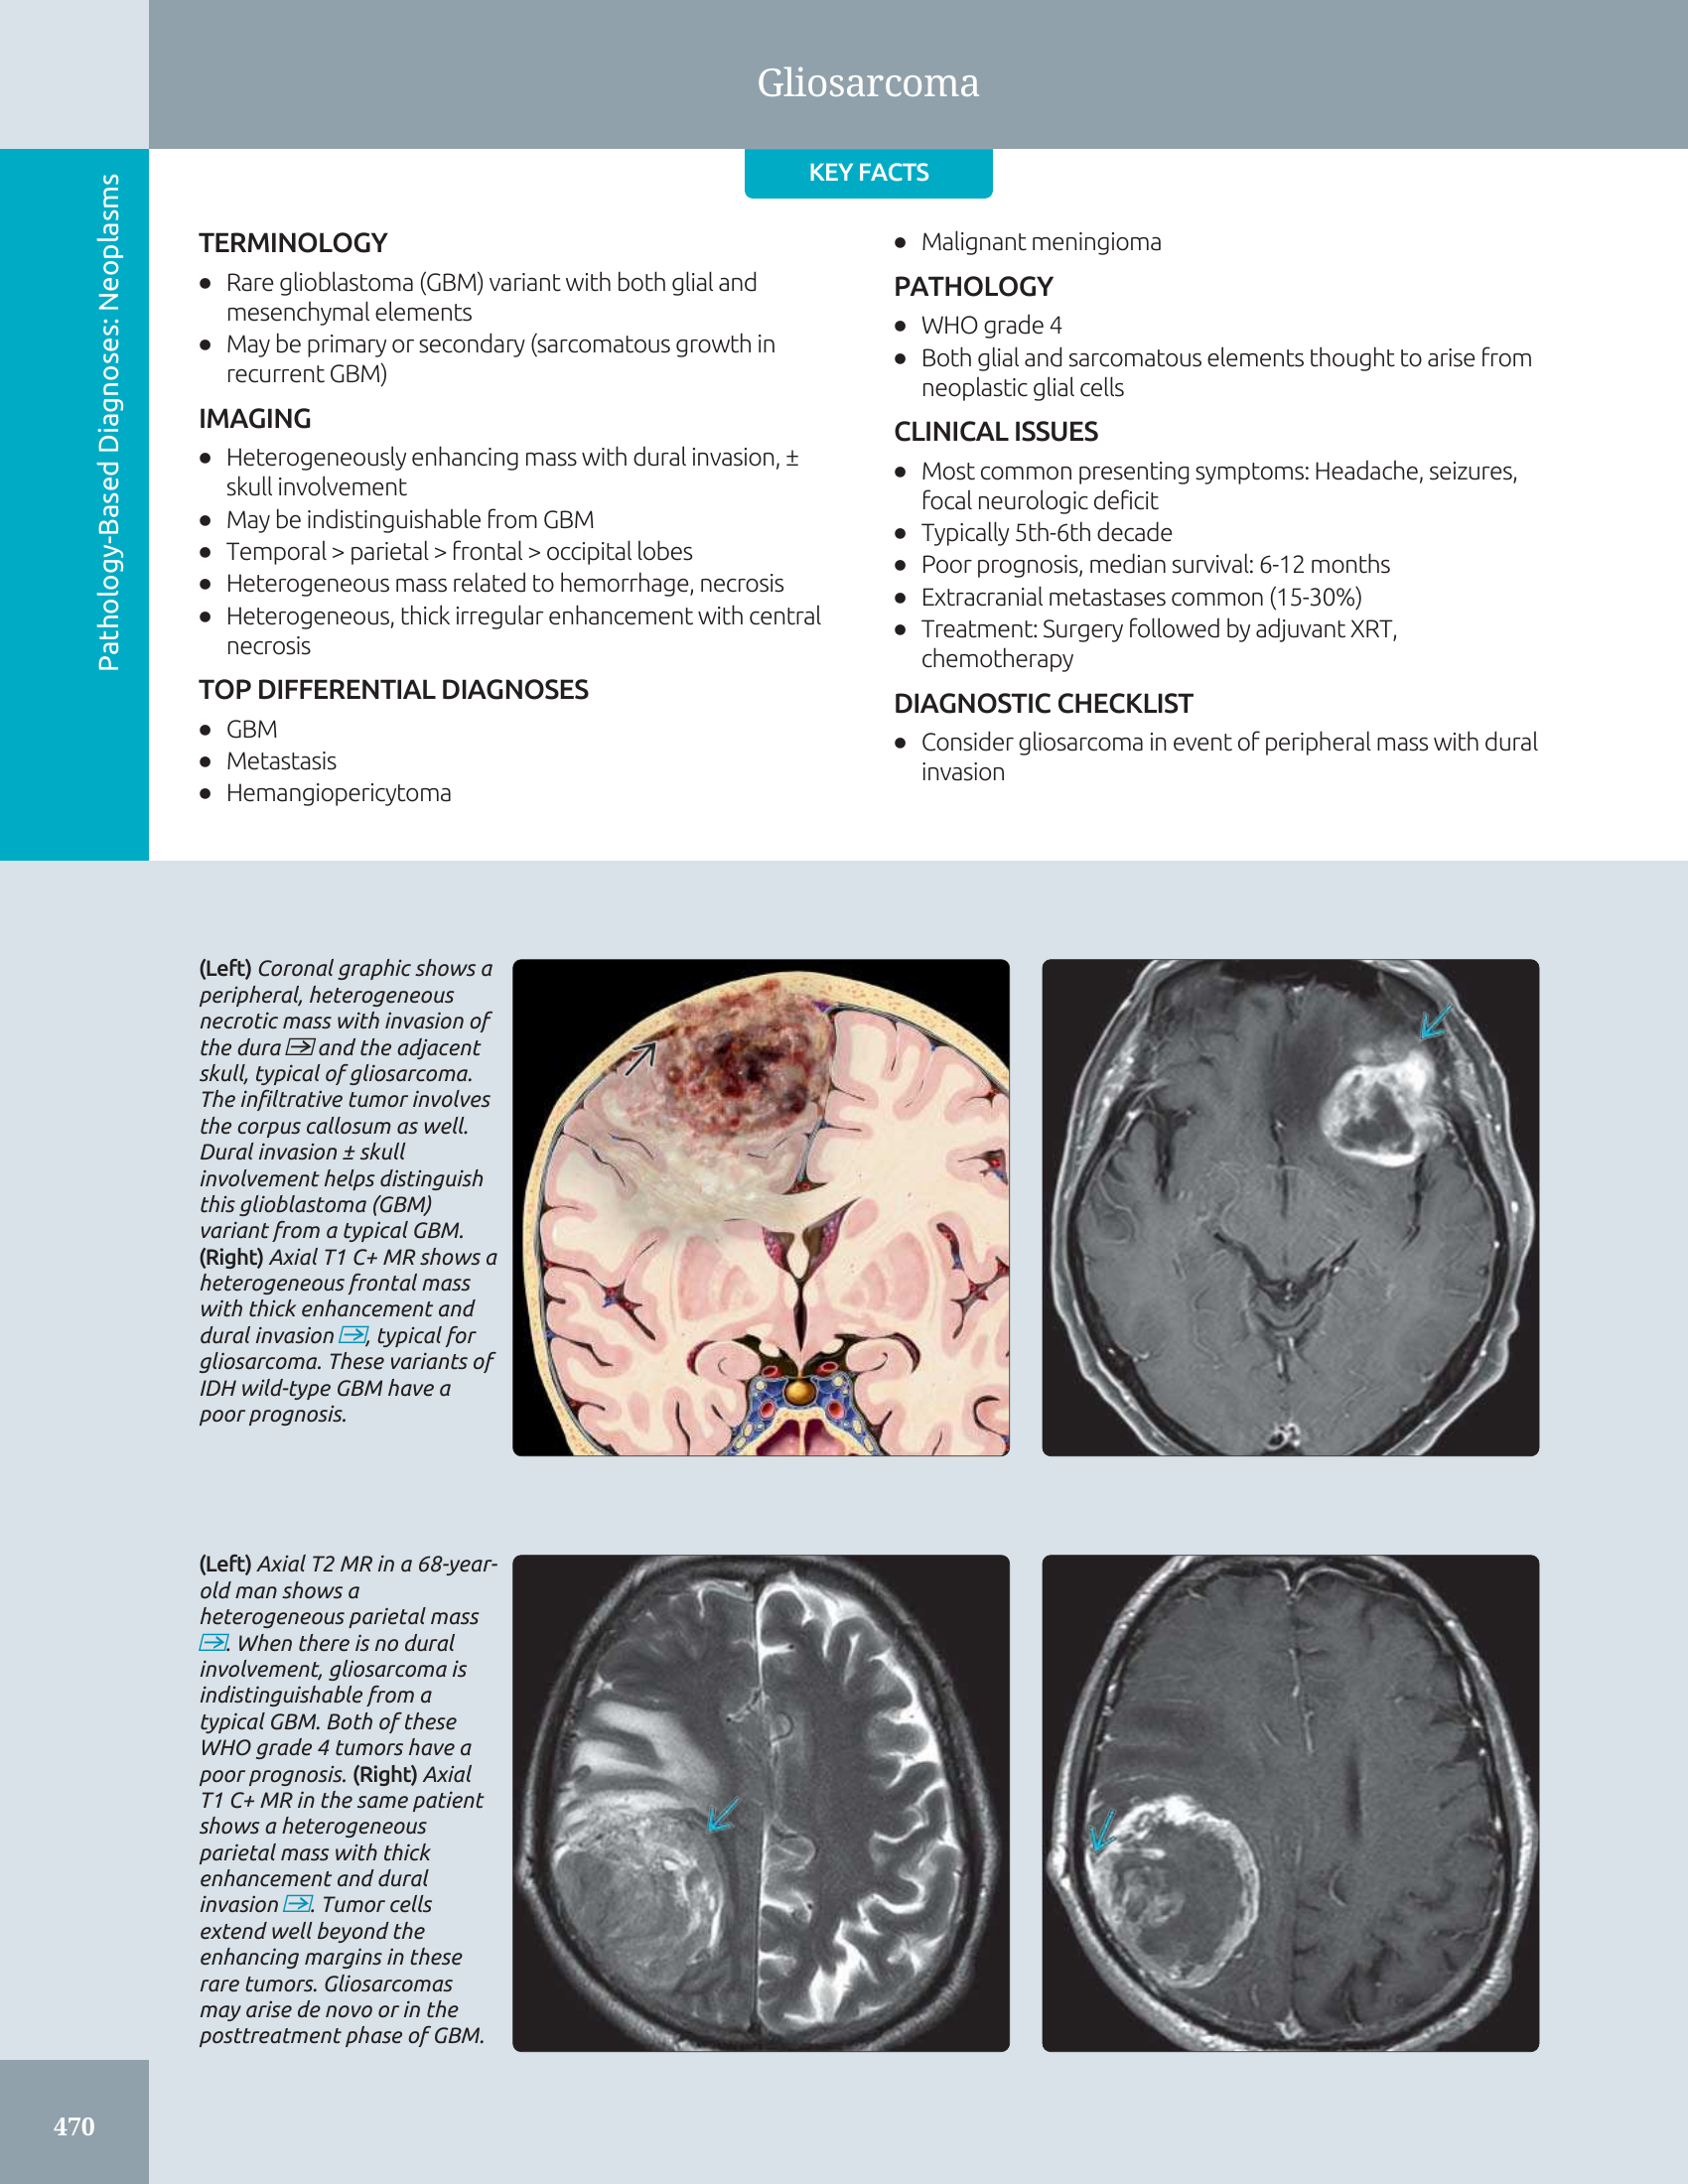

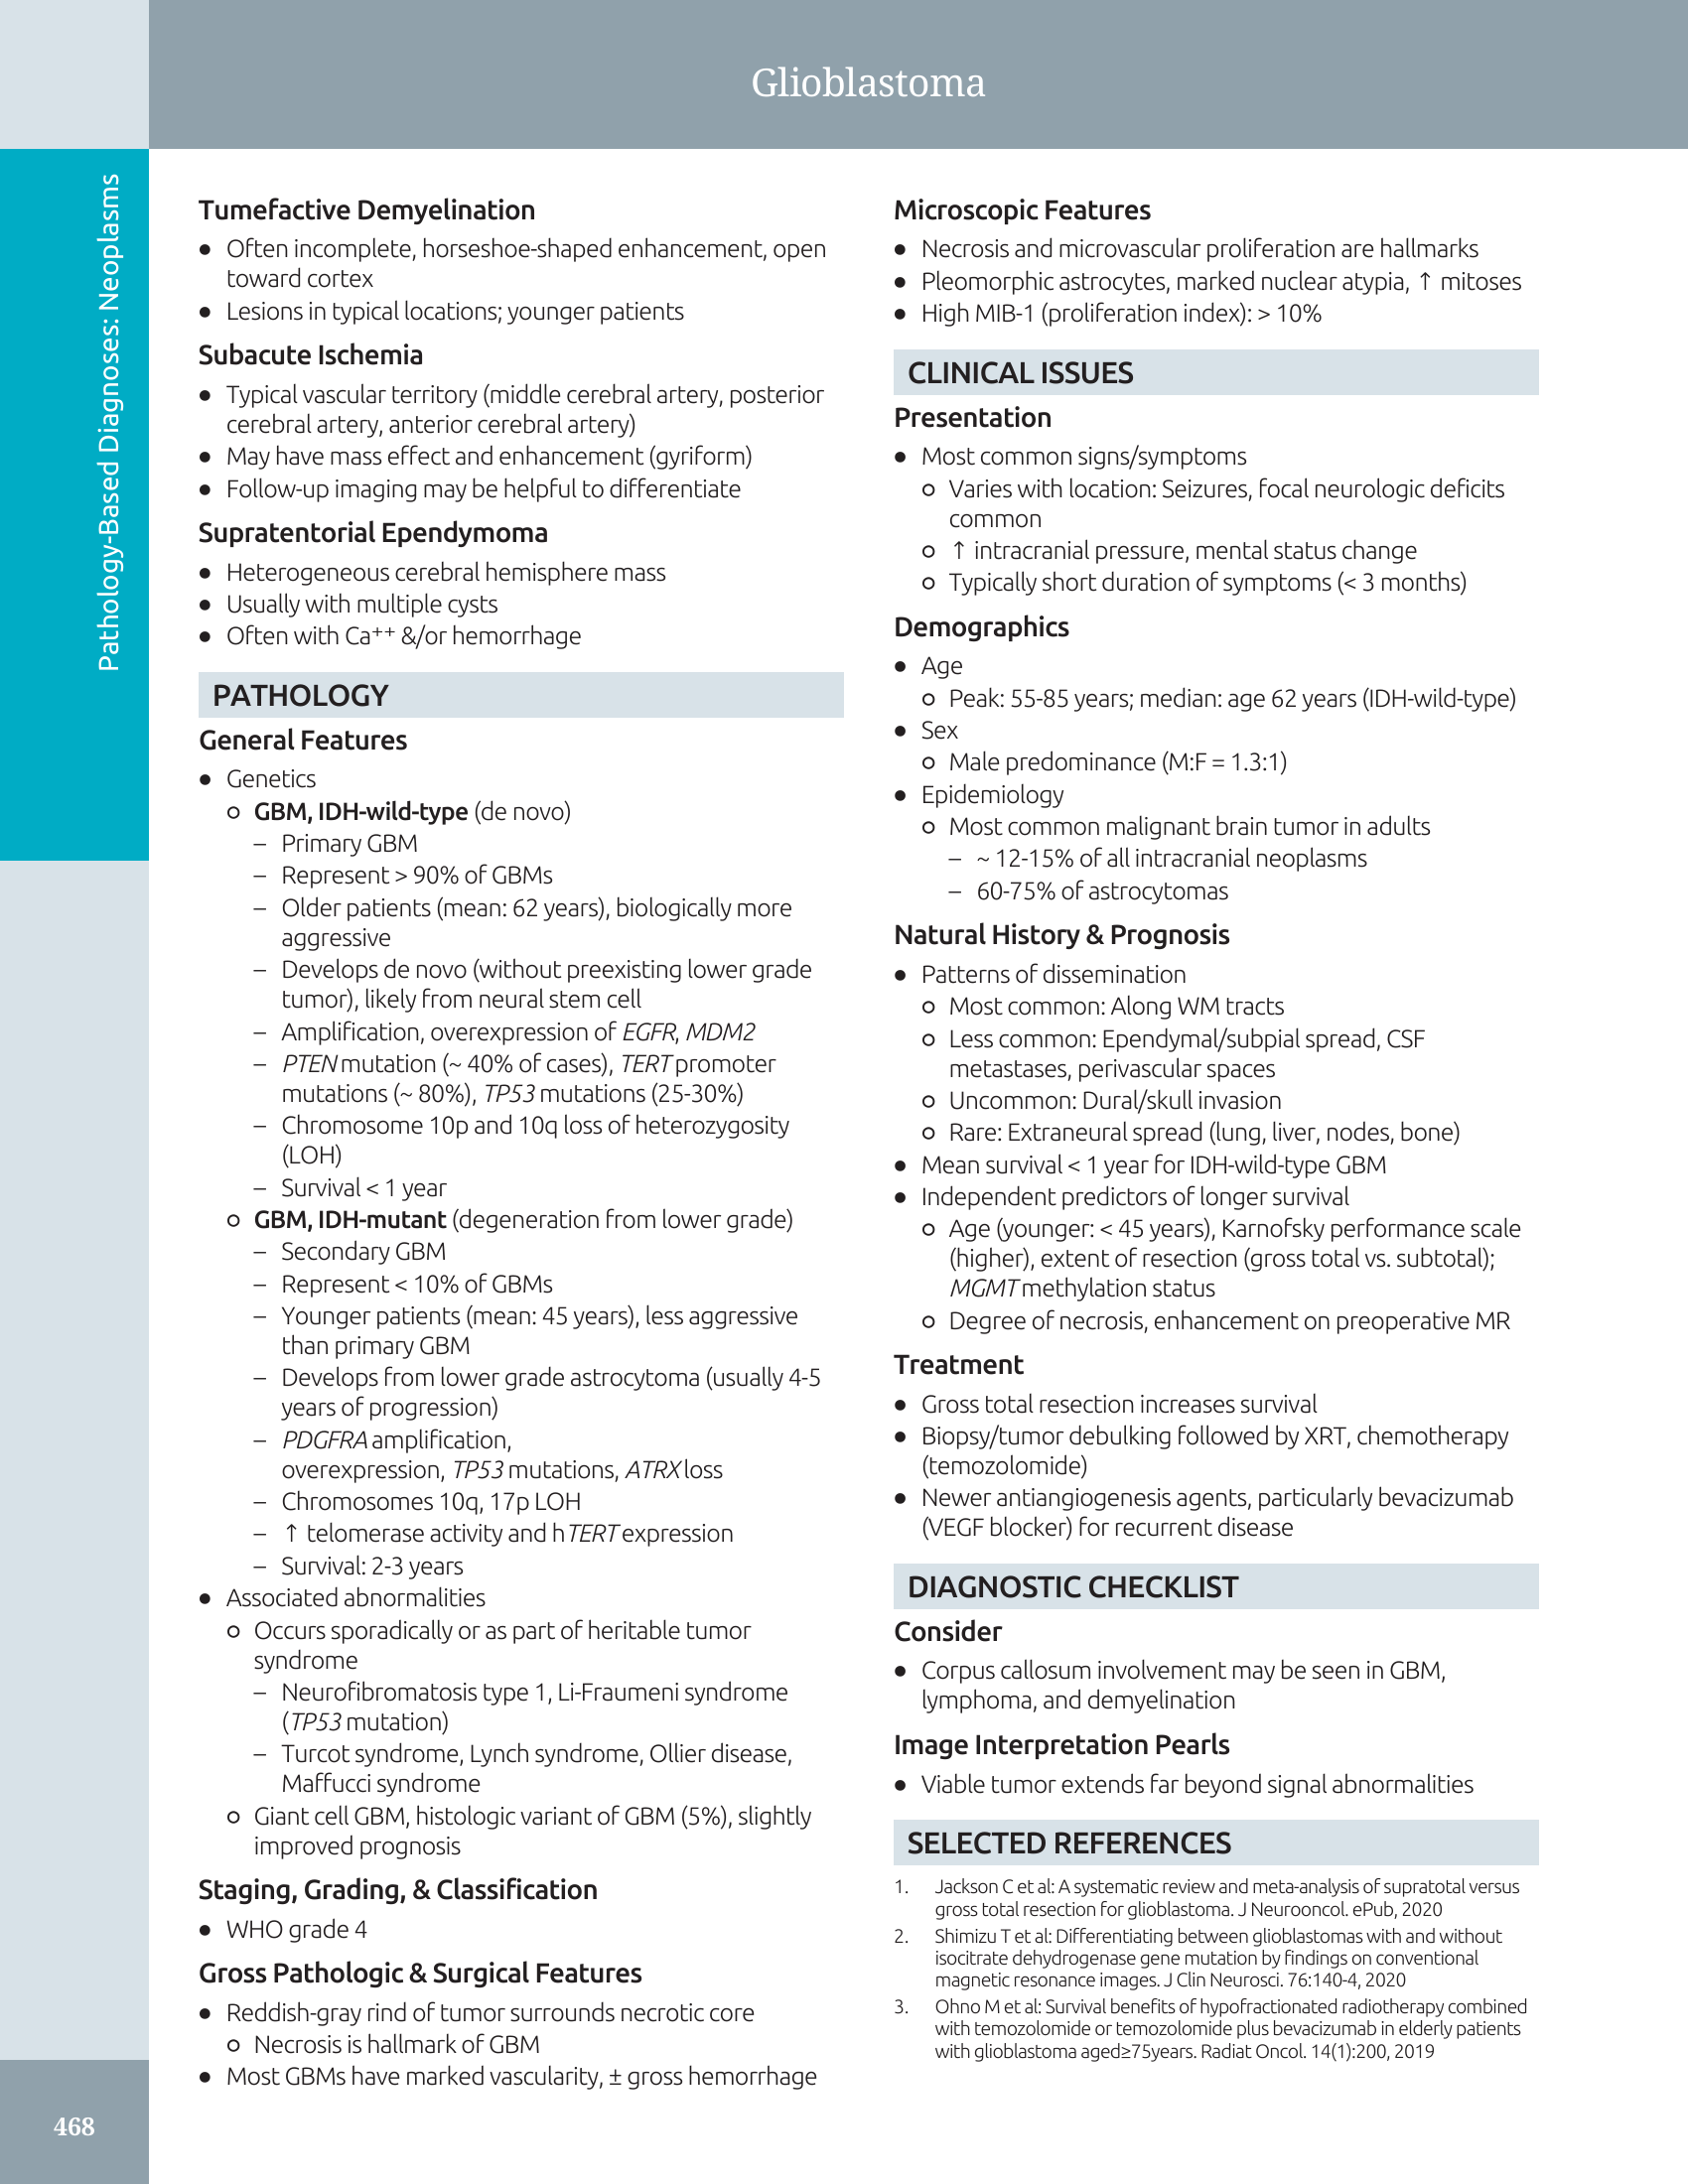

In [19]:
from IPython.display import Image

for idx, im in enumerate(image_bytes):
    filename = f'image_{idx}.jpg'  # Use a unique filename for each image
    with open(filename, 'wb') as f:
        f.write(im)
    display(Image(filename=filename))

In [20]:
!pip install langchain
from langchain.chat_models import ChatOpenAI

In [32]:
prompt = "How is gliosarcoma different from glioblastoma?"

In [33]:
from langchain_core.messages import SystemMessage, HumanMessage

def mm_chat(imglist, prompt):
  """Make image summary"""
  chat = ChatOpenAI(model = "gpt-4o", max_tokens = 1024)

  k=[]
  for i in imglist:
    k.append(i.base64)

  message_content = [
        {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{image_base64}"
            },
        }
        for image_base64 in k
    ]

  message_content.append({"type": "text", "text": prompt})

  msg = chat.invoke(
      [
          SystemMessage(content= """
          You are a helpful assistant that uses images to answer questions about brain neoplasms.
          Every single sentence must be based on the image provided.
          If there isn't information about the promp question in the image say that you don't know.
          """),
          HumanMessage(content=message_content)
      ]
  )
  return msg.content


mm_chat(results , prompt)

'Gliosarcoma and glioblastoma have several key differences:\n\n1. **Histological Composition**:\n   - **Gliosarcoma**: Contains both glial and mesenchymal (sarcomatous) elements.\n   - **Glioblastoma**: Predominantly glial with necrosis and microvascular proliferation.\n\n2. **Imaging Characteristics**:\n   - **Gliosarcoma**: Heterogeneously enhancing mass with potential dural and skull involvement.\n   - **Glioblastoma**: Typically shows necrosis and irregular enhancement without skull involvement.\n\n3. **Etiology**:\n   - **Gliosarcoma**: Can be primary or secondary (sarcomatous transformation of recurrent glioblastoma).\n   - **Glioblastoma**: Often primary, with genetic mutations such as IDH-wild-type.\n\n4. **Prognosis**:\n   - Both have poor prognoses, but gliosarcoma can have slightly different progression due to its sarcomatous component.\n\n5. **Demographics**:\n   - **Gliosarcoma**: Typically affects individuals in the 5th to 6th decade of life.\n   - **Glioblastoma**: Commo